In [68]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import classification_report

In [69]:
raw_data = pd.read_csv('/content/sample_data/train.csv', header=None, skiprows=1, names=['ID','A1_Score','A2_Score','A3_Score','A4_Score','A5_Score','A6_Score','A7_Score','A8_Score','A9_Score','A10_Score','age','gender','ethnicity','jaundice','austim','contry_of_res','used_app_before','result','age_desc','relation','Class/ASD'])


In [70]:
CATEGORICAL_COLUMNS = ['gender','ethnicity','jaundice','austim','contry_of_res','used_app_before','age_desc','relation']

In [71]:
features = CATEGORICAL_COLUMNS

In [72]:
new_raw_data = pd.get_dummies(raw_data, columns = CATEGORICAL_COLUMNS)

In [73]:
X = new_raw_data.drop('Class/ASD', axis=1).values
y = new_raw_data['Class/ASD'].values

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, test_size=0.2, random_state=0)

In [75]:
rf = RandomForestClassifier(n_estimators=100, criterion='entropy', class_weight=None)

In [76]:
rf.fit(X_train, y_train)
rf.score(X_test, y_test)
prediction_test = rf.predict(X=X_test)

In [ ]:
cv_scores = cross_val_score(rf, X, y, cv=10)
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", cv_scores.mean())
print("Standard Deviation of CV Scores:", cv_scores.std())

Cross-Validation Scores: [0.8875 0.7875 0.8375 0.8625 0.9    0.85   0.85   0.85   0.8875 0.825 ]
Mean CV Score: 0.85375
Standard Deviation of CV Scores: 0.03164747225293041


In [ ]:
print(classification_report(y_test, prediction_test))

              precision    recall  f1-score   support

           0       0.95      0.94      0.95       129
           1       0.76      0.81      0.78        31

    accuracy                           0.91       160
   macro avg       0.86      0.87      0.86       160
weighted avg       0.91      0.91      0.91       160



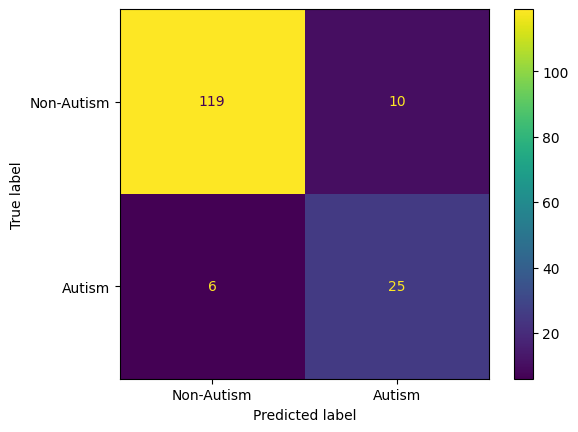

In [77]:
confusion_matrix = metrics.confusion_matrix(y_test, prediction_test)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['Non-Autism', 'Autism'])

cm_display.plot()
plt.show()